<a href="https://colab.research.google.com/github/SohamDahanukar/Machine-Learning/blob/main/exp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape data to fit the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 43s 90ms/step - loss: 0.3130 - accuracy: 0.9016 - val_loss: 0.0628 - val_accuracy: 0.9793
Epoch 2/10
469/469 [==============================] - 43s 92ms/step - loss: 0.1040 - accuracy: 0.9693 - val_loss: 0.0395 - val_accuracy: 0.9861
Epoch 3/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0791 - accuracy: 0.9756 - val_loss: 0.0341 - val_accuracy: 0.9887
Epoch 4/10
469/469 [==============================] - 43s 91ms/step - loss: 0.0662 - accuracy: 0.9801 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0563 - accuracy: 0.9831 - val_loss: 0.0321 - val_accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 44s 93ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0299 - val_accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0269 - val_accuracy:

In [6]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.02556965872645378
Test accuracy: 0.9922000169754028


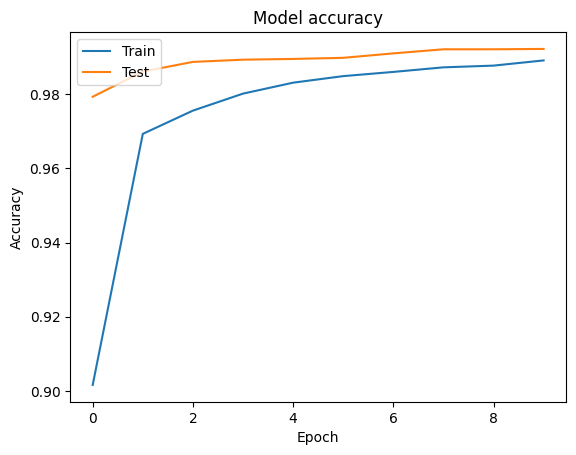

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [13]:
!pip install opencv-python


1/1 [==============================] - 0s 34ms/step
Predicted class: 3


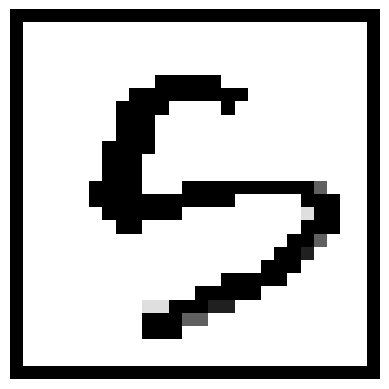

1/1 [==============================] - 0s 32ms/step
Predicted class: 0


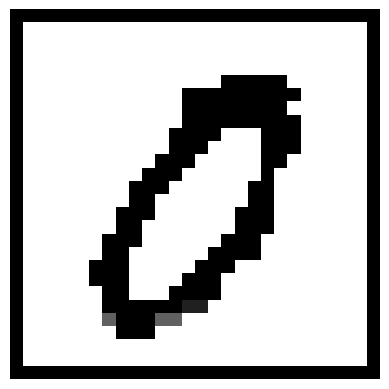

1/1 [==============================] - 0s 52ms/step
Predicted class: 0


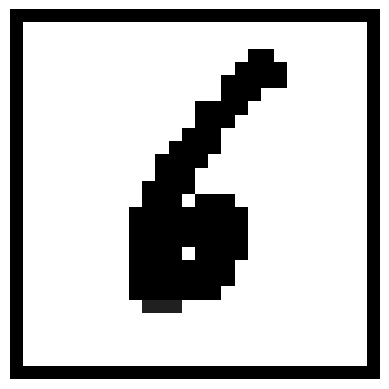

1/1 [==============================] - 0s 41ms/step
Predicted class: 0


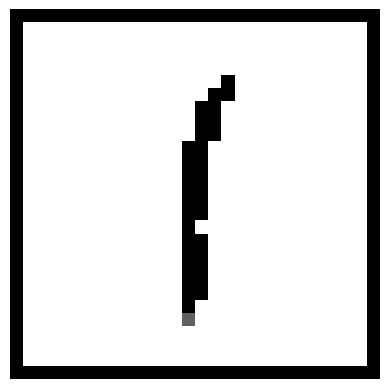

1/1 [==============================] - 0s 117ms/step
Predicted class: 7


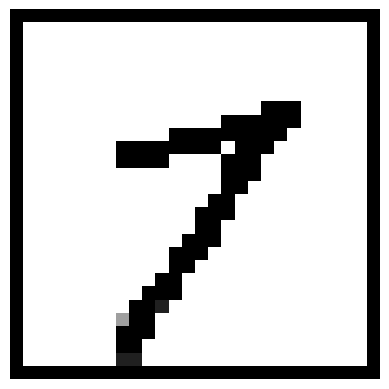

1/1 [==============================] - 0s 68ms/step
Predicted class: 0


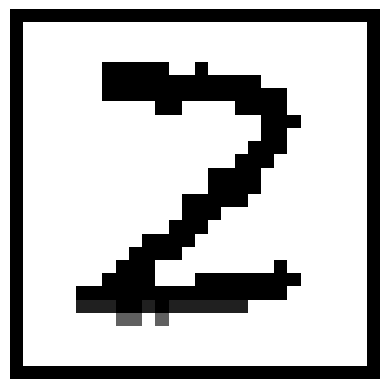

1/1 [==============================] - 0s 56ms/step
Predicted class: 8


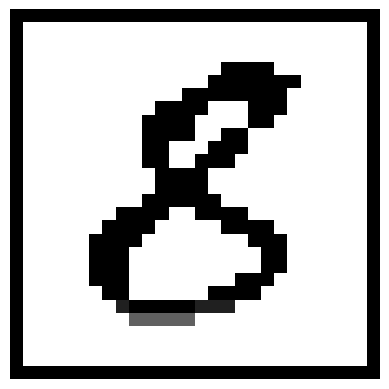

1/1 [==============================] - 0s 85ms/step
Predicted class: 8


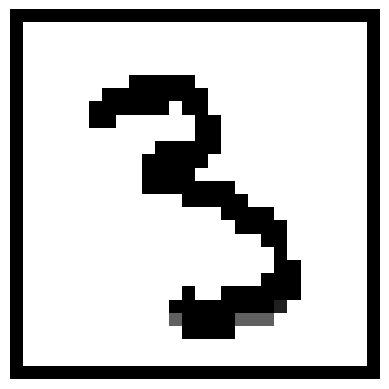

1/1 [==============================] - 0s 112ms/step
Predicted class: 0


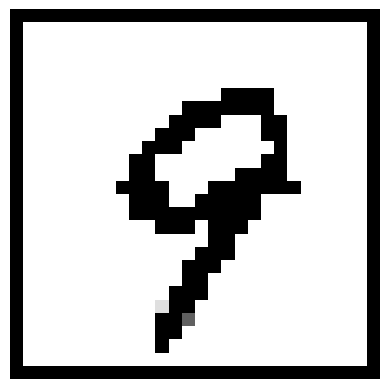

1/1 [==============================] - 0s 60ms/step
Predicted class: 0


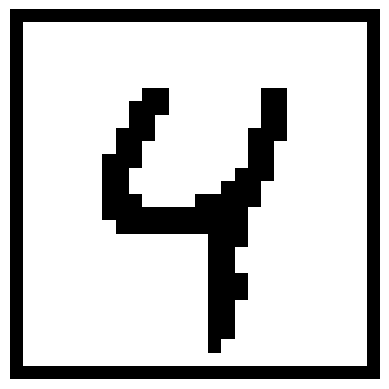

In [14]:
import cv2

# Load the image
input_image = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)

# Binarize the image using thresholding
_, binary_image = cv2.threshold(input_image, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours of the digits
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from left to right
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Extract each digit, resize it, and make predictions
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the digit
    digit_image = binary_image[y:y+h, x:x+w]

    # Resize the digit to 28x28 pixels
    digit_image = cv2.resize(digit_image, (28, 28))

    # Invert the image (if needed)
    digit_image = cv2.bitwise_not(digit_image)

    # Convert the digit to a numpy array
    digit_data = digit_image.reshape(1, 28, 28, 1).astype('float32') / 255.0

    # Make predictions using the model
    prediction = model.predict(digit_data)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    print("Predicted class:", predicted_class)

    # Display the digit
    plt.imshow(digit_image, cmap='gray')
    plt.axis('off')
    plt.show()
